In [1]:
import pandas as pd

url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(url)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
mapa = {
    "expected_hours":"horas_esperadas",
    "price":"preco",
    "unfinished":"nao_finalizado"
}

dados = dados.rename(columns = mapa)

In [3]:
trocar = {
    0 : 1,
    1: 0 
    }

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


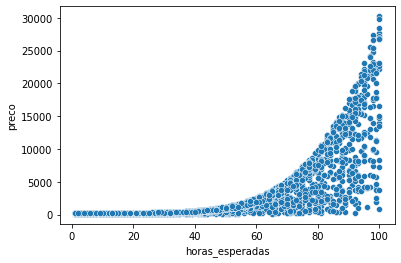

In [4]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

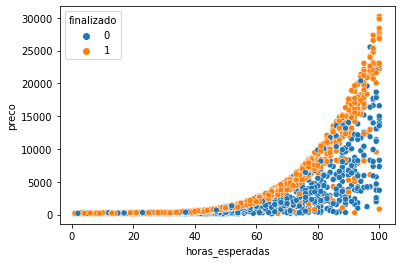

In [5]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

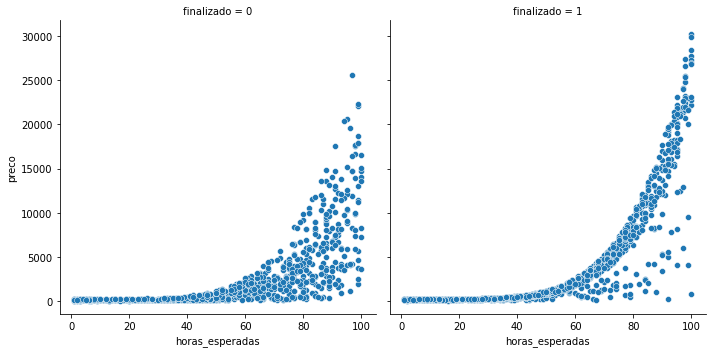

In [6]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

In [7]:
x = dados[["horas_esperadas", "preco"]]
y = dados['finalizado']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 6
np.random.seed(SEED)
treino_x2, teste_x2, treino_y2, teste_y2 = train_test_split(x,y, test_size = 0.25, stratify = y)

print(treino_x2.shape)
print(teste_x2.shape)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x2), len(teste_x2)))




model = LinearSVC()

model.fit(treino_x2, treino_y2)

previsoes = model.predict(teste_x2)

acuracia = accuracy_score(teste_y2, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

teste_y2.value_counts()

(1617, 2)
(540, 2)
Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 52.96%


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1    284
0    256
Name: finalizado, dtype: int64

In [11]:

import numpy as np

previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y2, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


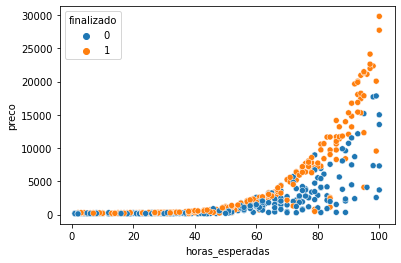

In [12]:

sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y2, data=teste_x2)

In [13]:
x_min = teste_x2.horas_esperadas.min()
x_max = teste_x2.horas_esperadas.max()
y_min = teste_x2.preco.min()
y_max = teste_x2.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 100 29820


In [14]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [15]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [16]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


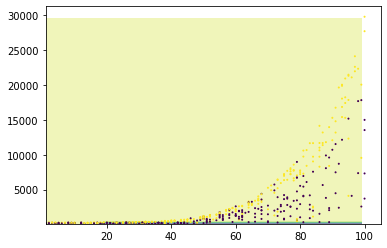

In [17]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x2.horas_esperadas, teste_x2.preco, c=teste_y2, s=1)

#DECISION BOUNDARY